### Problem Statment
Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

### Define the required libraries

In [2]:
#as of now we will import pandas, numpy library and the remainig will be downloaded at the time of theie requirement
import pandas as pd
import numpy as np

### loading the data set

In [3]:
data=pd.read_csv('loan_application.csv')

In [4]:
#observining into the data
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
# loading the data into data frame
#lets the variable be loap for loan application
loap=pd.DataFrame(data)

In [16]:
#
loap.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Obseravtions:
    1.there are maximum of 614 entries in each field
    2.there are few nan values also present in the data
    3.total columns are 13 in the data set
    4.8 string type data, 1 int data and 4 float type data present in the data set

### EDA(Exploratory Data Analysis)/visual and statistical analysis

### 1.Statistical Analysis

In [17]:
loap.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002648,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### observations:
    1.loan_ID is a reference number nothing to do with it, so we are going to drop it in the coming steps
    2.male count is the highest in the application of loan
    3.married are more tend to applying for the loans
    4.no dependents are tend to apply for the loan mostlikely
    5.graduates are apply for the loan highly
    6.self employeed are not more required the loan
    7.applicant income has high std compared to mean, there is large differnce in min 25th 50th 75th and max values
    8.point no 7 same with the coapplicant income also
    9.loan amount is having less std with high difference in min to 25th percentile and less difference between the remainig

In [18]:
loap.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [19]:
loap.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

tenure of 360 are more people interested in

In [20]:
loap.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

more people are having credit history

In [23]:
loap.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

most of the cases are good enough to provide the load

### study the nan value cases

In [26]:
loap.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### as my data points are less to feed to model there is no option of dropping the missing values.
#### I should handle the missing values carfully while replacing them.
#### lets do the visual analysis and missing values dealing at once

In [27]:
# importing the requied visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Univarient analysis

In [35]:
loap.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


13


<AxesSubplot:>

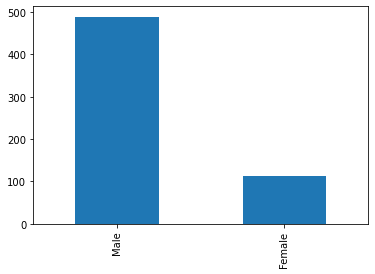

In [42]:
print(loap.Gender.isna().sum())
loap['Gender'].value_counts().plot.bar()

In [50]:
#as the most of applicants are male we are going to fill the missing values with Male
loap.Gender.replace(np.nan,'Male',inplace=True)
loap.Gender.isna().sum()

0

3


<AxesSubplot:>

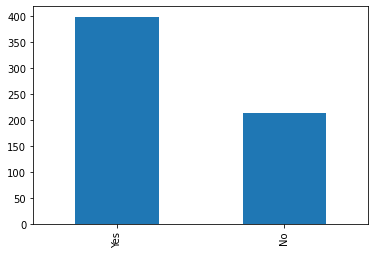

In [51]:
print(loap.Married.isna().sum())
loap['Married'].value_counts().plot.bar()

In [52]:
# as the most of applicatns are married we fill the missing value with Yes
loap.Married.replace(np.nan,'Yes',inplace=True)
loap.Married.isna().sum()

0

15


<AxesSubplot:>

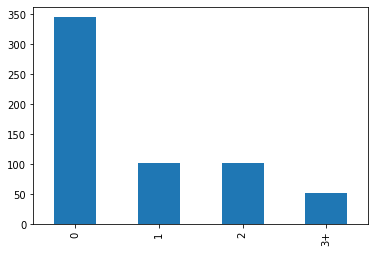

In [53]:
print(loap.Dependents.isna().sum())
loap['Dependents'].value_counts().plot.bar()

In [54]:
### people applying for loan are with dependent 0 is more so we replace the missing values with 0
loap.Dependents.replace(np.nan,0,inplace=True)
loap.Married.isna().sum()

0

0


<AxesSubplot:>

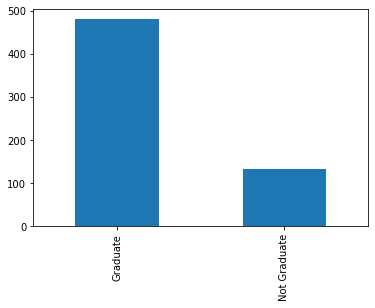

In [55]:
print(loap.Education.isna().sum())
loap['Education'].value_counts().plot.bar()

No null values in this futuer and most of applicants are Graduate's

32


<AxesSubplot:>

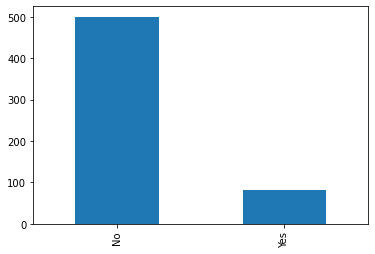

In [56]:
print(loap.Self_Employed.isna().sum())
loap['Self_Employed'].value_counts().plot.bar()

In [57]:
# most of the value is no so we will replace missing values with no
loap.Self_Employed.replace(np.nan,'no',inplace=True)
loap.Self_Employed.isna().sum()

0

0


<AxesSubplot:>

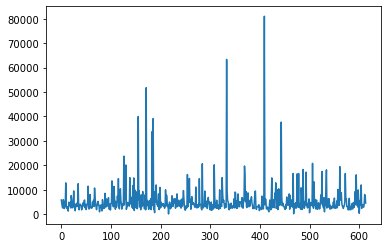

In [60]:
print(loap.ApplicantIncome.isna().sum())
loap['ApplicantIncome'].plot.line()

no missing values in applicant income and the income range is from 1500 to 80000

<AxesSubplot:>

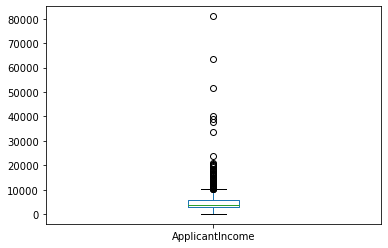

In [61]:
#checking for outliers
loap.ApplicantIncome.plot.box()

as we can see that the applicant Income is having many outliers 

In [74]:
# lets quickly calculate the Zscore for this future
from scipy.stats import zscore
z=np.abs(zscore(loap.ApplicantIncome))
threshold=3
np.where(z>3)
#less no are in the range of z score greater than 3 like here it is 8

(array([126, 155, 171, 183, 185, 333, 409, 443], dtype=int64),)

0


<AxesSubplot:>

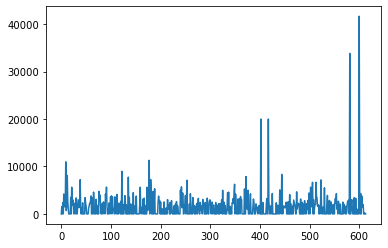

In [76]:
print(loap.CoapplicantIncome.isna().sum())
loap['CoapplicantIncome'].plot.line()

no nan values to replace

<AxesSubplot:>

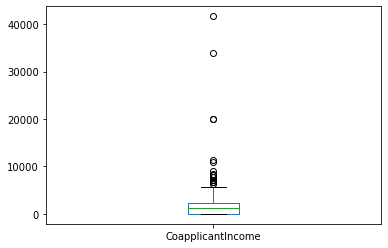

In [77]:
#lets check the outliers
loap.CoapplicantIncome.plot.box()

it is also having a few outlier

22


<AxesSubplot:>

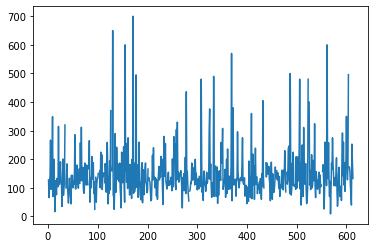

In [80]:
print(loap.LoanAmount.isna().sum())
loap['LoanAmount'].plot.line()

there are 22 values missing in the loan amount column
before filling the missed values let check the outliers in it so that we can decide filling value is mean or median 

<AxesSubplot:>

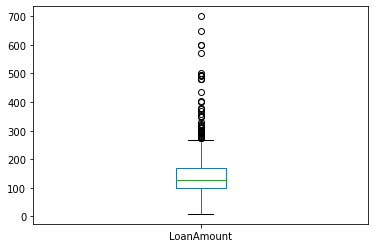

In [83]:
loap.LoanAmount.plot.box(by=loap.LoanAmount.notna())

In [85]:
#as it is havng the outliers we are going to fill the missing values with mean
loap.LoanAmount.mean()


146.41216216216216

In [88]:
loap.LoanAmount.replace(np.nan,round(loap.LoanAmount.mean(),2),inplace=True)
print(loap.LoanAmount.isna().sum())

0


In [89]:
# we have to change the loan amount from numeric to string type i.e object type
loap['Loan_Amount_Term']=loap['Loan_Amount_Term'].astype(object)

14


<AxesSubplot:>

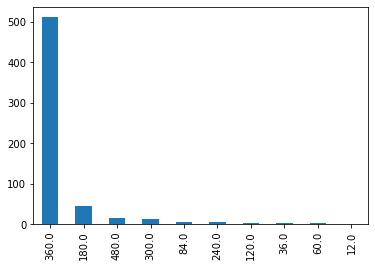

In [93]:
print(loap['Loan_Amount_Term'].isna().sum())
loap['Loan_Amount_Term'].value_counts().plot.bar()

In [97]:
#360 tenure is the highest 
#so replace the missing values with 360
loap['Loan_Amount_Term'].replace(np.nan,'360', inplace=True)
print(loap['Loan_Amount_Term'].isna().sum())

0


50


<AxesSubplot:>

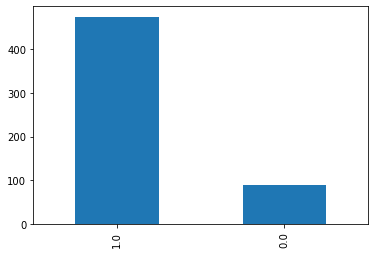

In [98]:
print(loap['Credit_History'].isna().sum())
loap['Credit_History'].value_counts().plot.bar()

In [99]:
#yes is having the major count so filling the missing values with the yes
loap['Credit_History'].replace(np.nan,'yes', inplace=True)
print(loap['Credit_History'].isna().sum())

0


0


<AxesSubplot:>

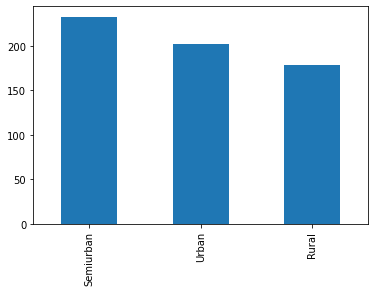

In [100]:
print(loap['Property_Area'].isna().sum())
loap['Property_Area'].value_counts().plot.bar()

no null values

0


<AxesSubplot:>

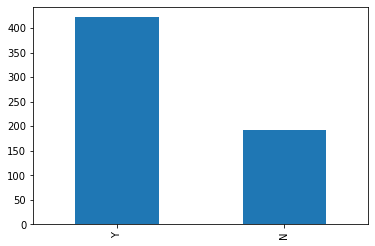

In [101]:
print(loap['Loan_Status'].isna().sum())
loap['Loan_Status'].value_counts().plot.bar()

no null values

### bivarient analysis

In [153]:
# before going to do the bivarient analysis lets conver the classification data into numeric
# importing the encoders from the sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb=LabelEncoder()
for i in loap.columns:
    if loap[i].dtype==object:
        loap[i]=lb.fit_transform(loap[i])

In [154]:
loap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int32  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(2), int32(8), int64(3)
memory usage: 43.3 KB


In [148]:
loap['Loan_Amount_Term']=loap['Loan_Amount_Term'].astype(object)
loap.Credit_History.replace('yes',0,inplace=True)

In [152]:
loap['Loan_Status']=lb.fit_transform(loap['Loan_Status'])

In [149]:
loap.Credit_History.value_counts()

1.0    475
0.0    139
Name: Credit_History, dtype: int64

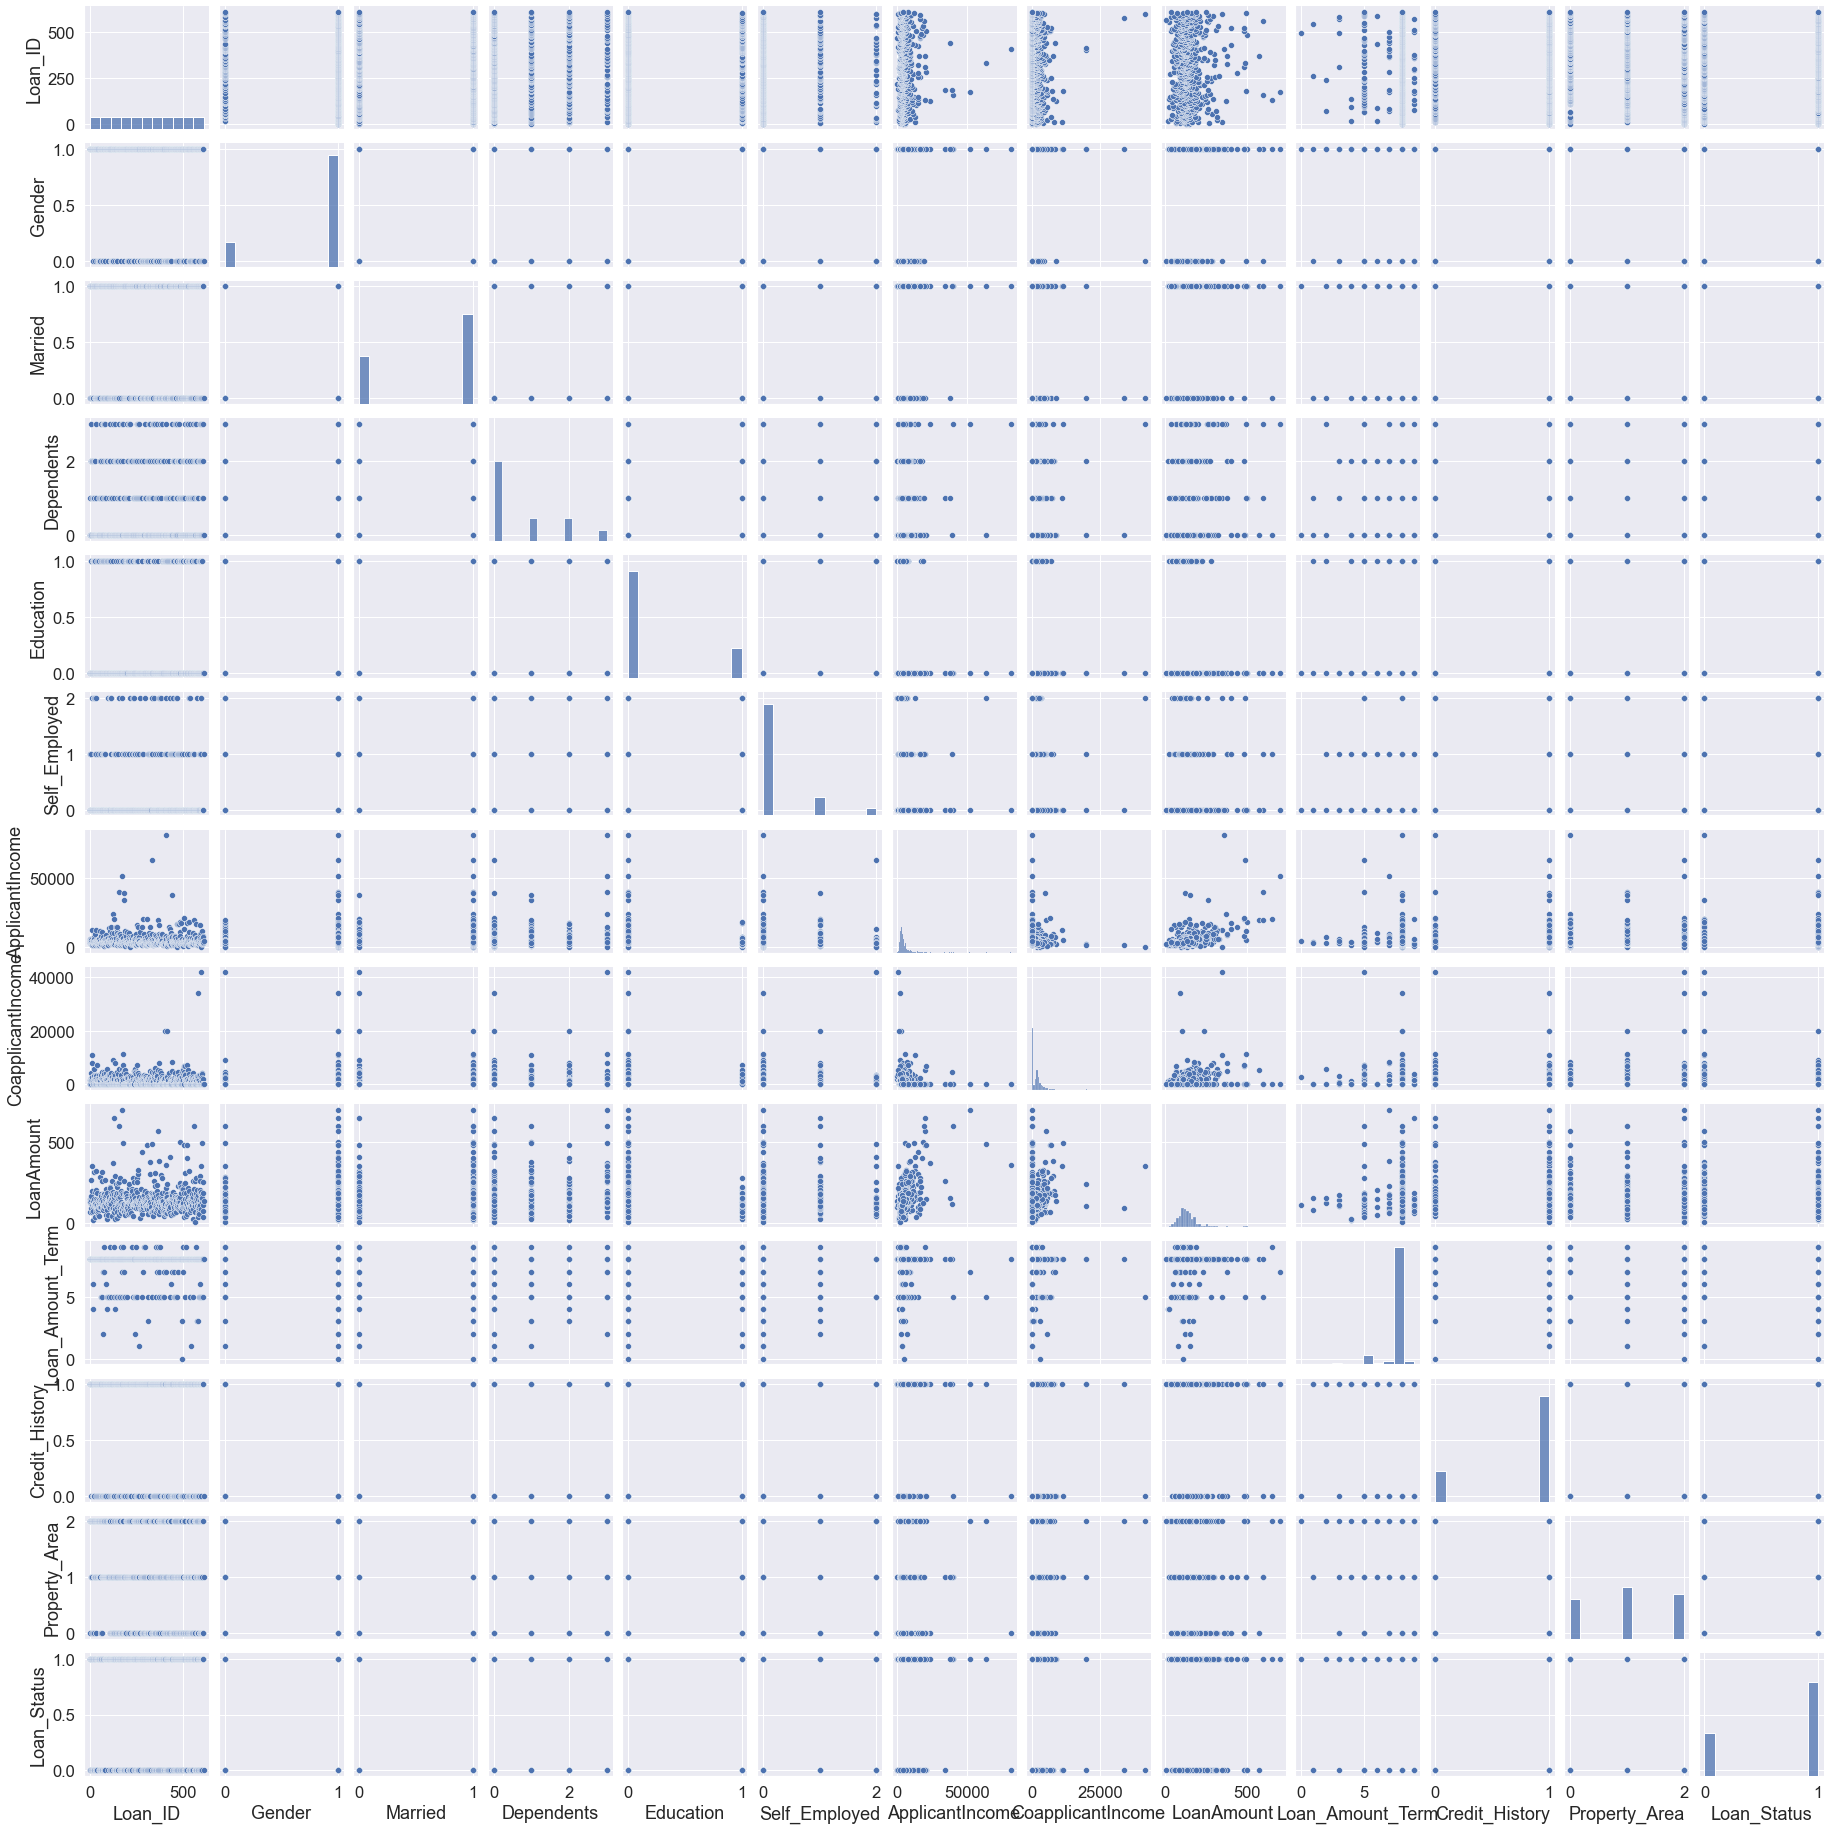

In [161]:
sns.set(font_scale=2)
sns.set_theme(style='darkgrid',palette='deep',font_scale=1.5)
sns.pairplot(loap,height=2,aspect=1)

### removing of outliers

In [162]:
z=np.abs(zscore(loap))

In [172]:
throshold=3
a=np.where(z>4)
b=np.where(z<=3)

In [181]:
#if i take z value less than 3 I am loosing the data more than 10%
# so I am taking the z value <=4
loap1=loap[(z<=4).all(axis=1)]

In [183]:
c=loap.size-loap1.size
print('loss in data',c*100/loap.size,'%')

loss in data 4.234527687296417 %


In [184]:
loap1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.41,8,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.00,8,1,0,0


### checking the correlation bewteen continuous data with the loan status

<AxesSubplot:>

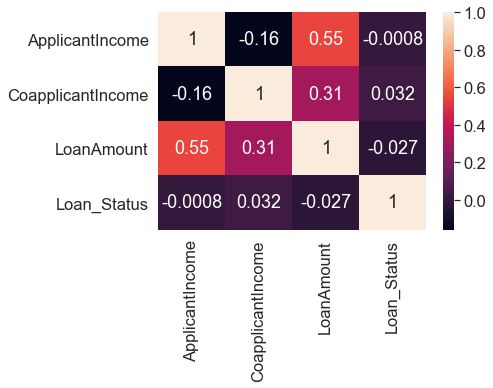

In [187]:
sns.heatmap(loap1.iloc[:,[6,7,8,-1]].corr(), annot=True)

### VIF calculation

In [189]:
# importing the required liibraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
x=loap1.iloc[:,[6,7,8,-1]]

        column_names  VIF Values
0         LoanAmount    8.229750
1    ApplicantIncome    5.342783
2        Loan_Status    2.316867
3  CoapplicantIncome    2.262954


array([<AxesSubplot:title={'center':'VIF Values'}, xlabel='column_names'>],
      dtype=object)

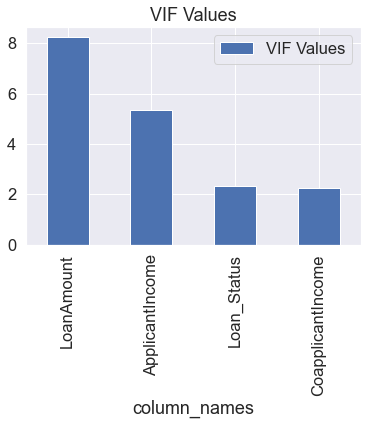

In [192]:
vf=pd.DataFrame()
vf['column_names']=x.columns
vf['VIF Values']=[variance_inflation_factor(x.values,n) for n in range(x.shape[1])]
vf.sort_values(by='VIF Values', ascending=False, inplace=True, ignore_index=True)
print(vf)
vf.plot.bar(x='column_names', y='VIF Values',stacked=True, subplots=True, rot=90)

there is no much infaltion factor with the continuous data columns

### Checking the skeweness and removing it

In [193]:
# importing the required libraries
from scipy.stats import boxcox 
from sklearn.preprocessing import power_transform

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

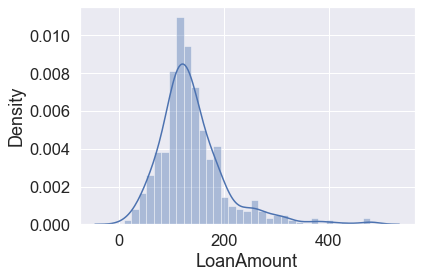

In [194]:
sns.distplot(loap1.LoanAmount)

In [195]:
d1=np.array(loap1.LoanAmount)
loap1.LoanAmount=power_transform(d1.reshape(-1,1))

C:\Users\smahi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

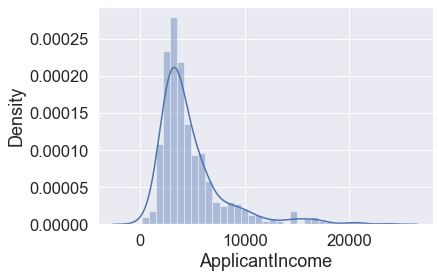

In [197]:
sns.distplot(loap1.ApplicantIncome)

In [198]:
d1=np.array(loap1.ApplicantIncome)
loap1.ApplicantIncome=power_transform(d1.reshape(-1,1))

C:\Users\smahi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

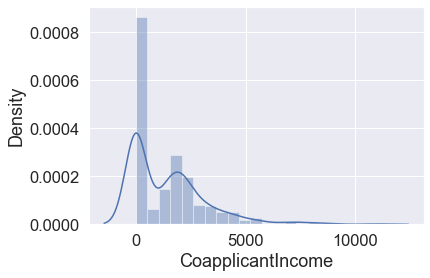

In [201]:
sns.distplot(loap1.CoapplicantIncome)

In [202]:
d1=np.array(loap1.CoapplicantIncome)
loap1.CoapplicantIncome=power_transform(d1.reshape(-1,1))

C:\Users\smahi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Scaling

In [204]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#minamx scaler reduce the value of data in between 0 and 1

In [206]:
x1=loap1.iloc[:,[6,7,8]]
scale=StandardScaler()
for i in loap1.iloc[:,[6,7,8]]:
    d=np.array(x1[i])
    scale.fit(d.reshape(-1,1))
    scale.transform(d.reshape(-1,1))
    x1[i]=d
    

<ipython-input-206-094db774f084>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[i]=d
<ipython-input-206-094db774f084>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[i]=d
<ipython-input-206-094db774f084>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[i]=

In [214]:
loap1['ApplicantIncome']=x1['ApplicantIncome']

<ipython-input-214-f03385d2d152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loap1['ApplicantIncome']=x1['ApplicantIncome']


In [215]:
loap1['CoapplicantIncome']=x1['CoapplicantIncome']

<ipython-input-215-1e534d528c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loap1['CoapplicantIncome']=x1['CoapplicantIncome']


In [216]:
loap1['LoanAmount']=x1['LoanAmount']

<ipython-input-216-6512d9a13655>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loap1['LoanAmount']=x1['LoanAmount']


### balancing the Data Set

In [237]:
x=loap1.iloc[:,1:-1]
y=loap1.iloc[:,-1]

In [238]:
# data points size before balancing the data
x.shape,y.shape, y.value_counts()

((588, 11),
 (588,),
 1    407
 0    181
 Name: Loan_Status, dtype: int64)

In [239]:
# importing the required library
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x, y)

In [240]:
# data points size aftere balancing the data
x.shape,y.shape, y.value_counts()

((814, 11),
 (814,),
 0    407
 1    407
 Name: Loan_Status, dtype: int64)

### Hyper perameter Tuning

In [241]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [242]:
lr,rf,ac,dt=LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()

In [243]:
# for that we are going to import 
from sklearn.model_selection import GridSearchCV
#creating perameters
model_par={
           lr:{'model':lr,'param':{'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
    rf:{'model':rf,'param':{'n_estimators':[100,125,150,200],'criterion':["gini", "entropy"],'min_samples_split':[2,2.5,3,3.5]}},
    ac:{'model':ac,'param':{'n_estimators':[50,100,150,200],'learning_rate':[1,2,3,4],'algorithm':['SAMME', 'SAMME.R']}},
    dt:{'model':dt,'param':{'criterion':["gini", "entropy"],'splitter':['best','random'],'min_samples_leaf':[1,2,3]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': LogisticRegression(),
  'best_score': 0.7544118760887677,
  'best_params': {'penalty': 'l1', 'solver': 'saga'}},
 {'model': RandomForestClassifier(),
  'best_score': 0.8096720442323715,
  'best_params': {'criterion': 'entropy',
   'min_samples_split': 3,
   'n_estimators': 125}},
 {'model': AdaBoostClassifier(),
  'best_score': 0.7568582897826251,
  'best_params': {'algorithm': 'SAMME',
   'learning_rate': 1,
   'n_estimators': 50}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.7444898886616679,
  'best_params': {'criterion': 'gini',
   'min_samples_leaf': 2,
   'splitter': 'best'}}]

So we are going to select the RandomForestClassifier as it was highest score from gridsearch cv

In [244]:
lg=RandomForestClassifier(criterion='entropy',min_samples_split=3)

the model performs best at random state 20
test accuracy_score of 0.9224489795918367
test roc_auc_score of 0.9707078112503332
train accuracy_score of 0.929701230228471
train roc_auc_score of 0.9738627097284341
cross validation score 77.52288184646552
confusion_matrix of 
 [[108  13]
 [  6 118]]
classification_report of 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       121
           1       0.90      0.95      0.93       124

    accuracy                           0.92       245
   macro avg       0.92      0.92      0.92       245
weighted avg       0.92      0.92      0.92       245



Text(0.5, 1.0, 'ROC Curve')

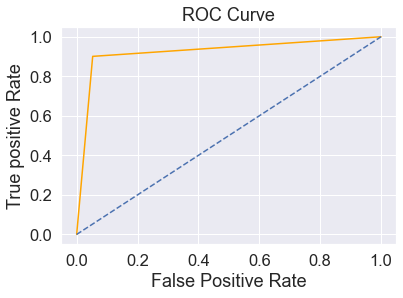

In [249]:
tep,trp,cv,I=[],[],[],[]
for i in range(1,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=i)
    lg.fit(xtrain,ytrain)
    test_pre=lg.predict(xtest)
    train_pre=lg.predict(xtrain)
    Tep=accuracy_score(ytest,test_pre)
    Trp=accuracy_score(ytrain,train_pre)
    Cv=cross_val_score(lg,x,y,cv=3).mean()*100
    tep.append(Tep)
    trp.append(Trp)
    cv.append(Cv)
    I.append(i)
    
values=pd.DataFrame({'Test_acc':tep,'Train_acc':trp,'Cross_validation_score':cv,'random_state':I})
values.sort_values(by='Test_acc',inplace=True,ignore_index=True)
print('the model performs best at random state',values.iloc[0,3])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=values.iloc[0,3])
test_pre=lg.predict(xtest)
train_pre=lg.predict(xtrain)
test_pre_prob=lg.predict_proba(xtest)
train_pre_prob=lg.predict_proba(xtrain)
print("test accuracy_score of",accuracy_score(ytest,test_pre))
print("test roc_auc_score of", roc_auc_score(ytest,test_pre_prob[:,1]))
print("train accuracy_score of",accuracy_score(ytrain,train_pre))
print("train roc_auc_score of", roc_auc_score(ytrain,train_pre_prob[:,1]))
print("cross validation score", cross_val_score(lg,x,y,cv=3).mean()*100)
print("confusion_matrix of",'\n', confusion_matrix(ytest,test_pre))
print("classification_report of",'\n',classification_report(ytest,test_pre))
fpr,tpr,tr=roc_curve(test_pre, ytest)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")

In [250]:
#model saving
import pickle
filename='loan_application.pkl'
pickle.dump(lg,open(filename,'wb'))